In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
filepath_home= 'D:/Dacon_Psychological_disposition/'
filepath_out = 'C:/임시/Dacon_Psychological_disposition/' 
train = pd.read_csv(filepath_home+'train.csv')
test = pd.read_csv(filepath_home+'test_x.csv')

In [4]:
# 분할 지점 저장해두고 데이터 통합 후 전처리
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True)

In [5]:
existing_word_cols = ['wr_'+'0'*(2-len(str(i)))+str(i) for i in range(1,14)]
not_existing_word_cols = ['wf_'+'0'*(2-len(str(i)))+str(i) for i in range(1,4)]
vocab_cols=data[not_existing_word_cols+existing_word_cols].copy()

In [6]:
vocab_cols.head(2) # YES:1 , NO:0

,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1


# 10.14

### 사람들이 거의 모르거나 , 대부분 아는 단어가 있나

In [9]:
# 질문 별 안다고 답변한 사람 비율
round((vocab_cols.sum()/vocab_cols.shape[0])*100,2)

wf_01     7.96
wf_02    16.44
wf_03    11.84
wr_01    71.04
wr_02    93.44
wr_03    20.88
wr_04    86.97
wr_05    89.59
wr_06    32.86
wr_07    93.88
wr_08    97.22
wr_09    20.18
wr_10    94.61
wr_11    39.54
wr_12    94.84
wr_13    92.66
dtype: float64

wf_01 : 없는 단어인걸 대부분 아는듯함 , 실제로는 92%가 안다고 대답한 것과 같은 의미  
wr_03 : 20.88% 가 안다고 대답, 어려운 단어인듯함 -> 아는 사람들 사이 특징이 있나  
wr_09 : 20.18% 가 안다고 대답, 어려운 단어인듯함 -> 아는 사람들 사이 특징이 있나  
wr_08,wr_10,wr_12 : 특히나 높은 비율로 안다고 대답 -> 모른다고 답변한 사람들 사이 특징이 있나  

### 비율 시각화

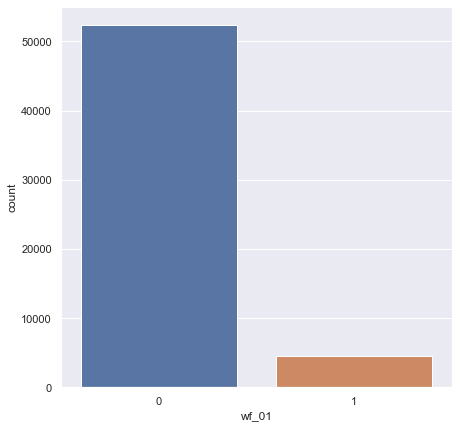

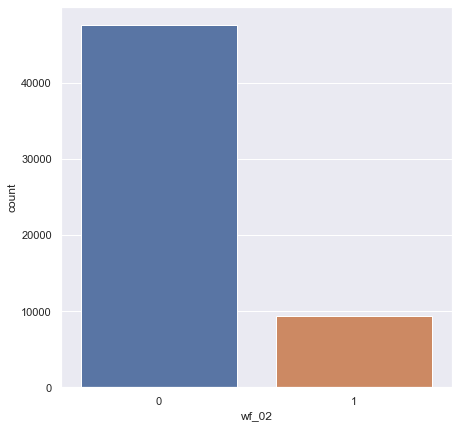

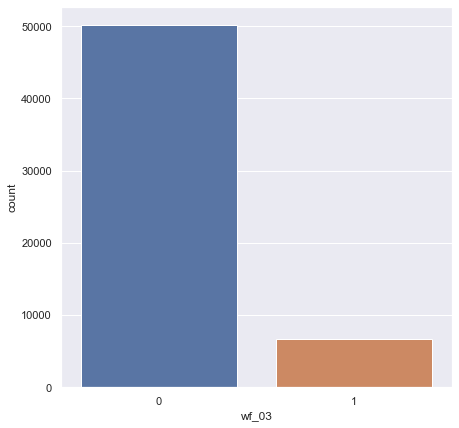

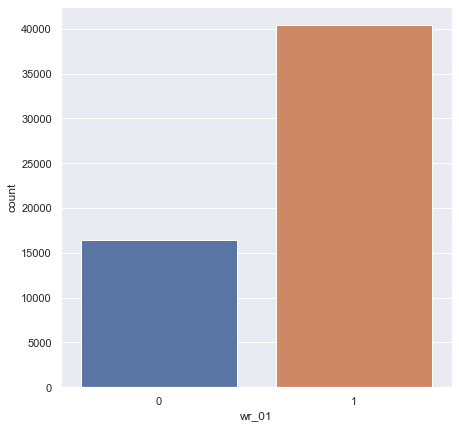

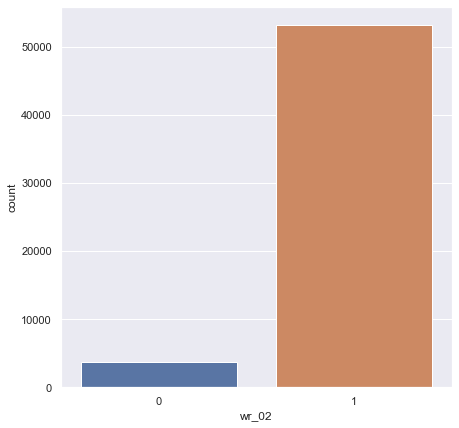

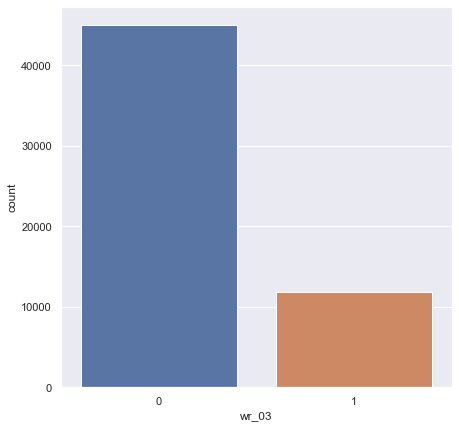

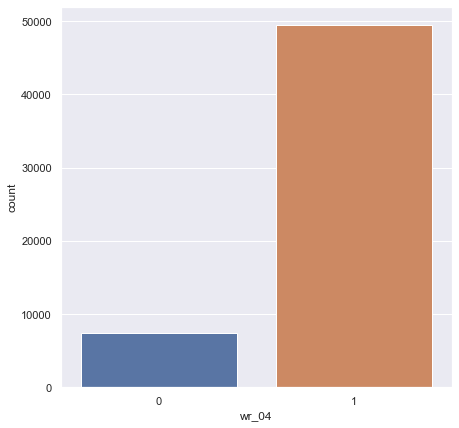

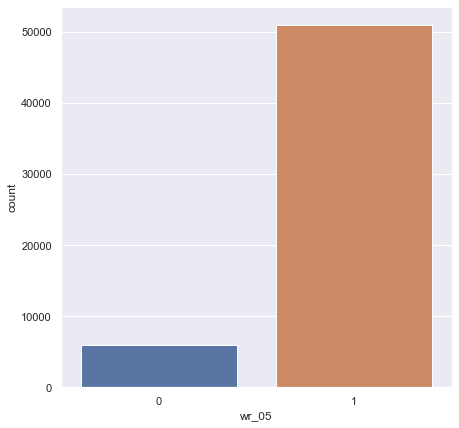

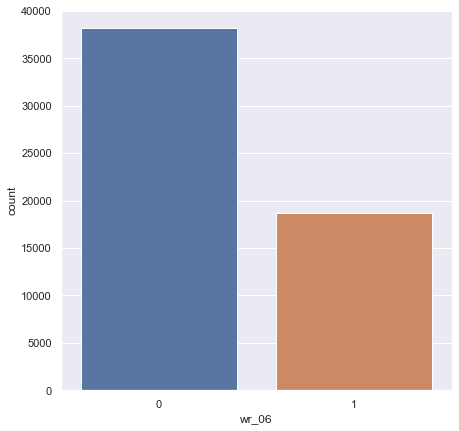

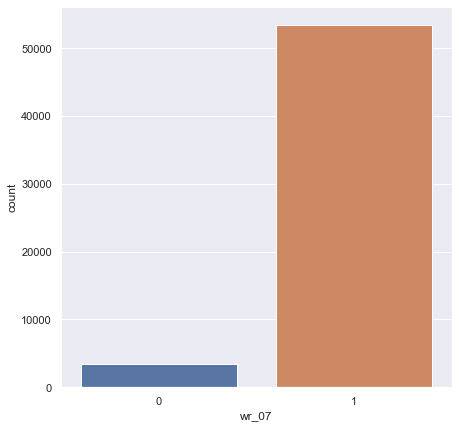

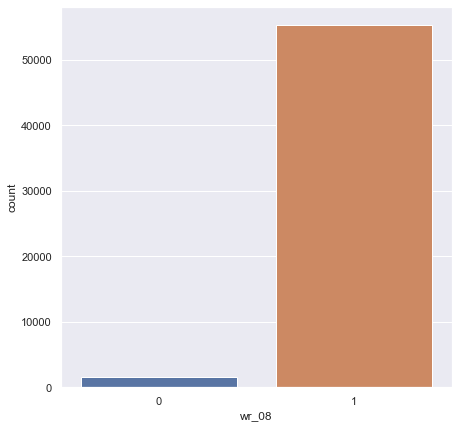

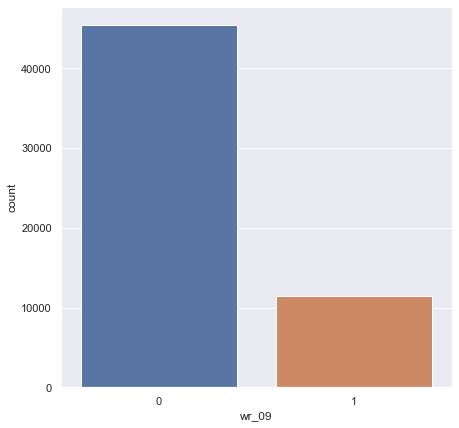

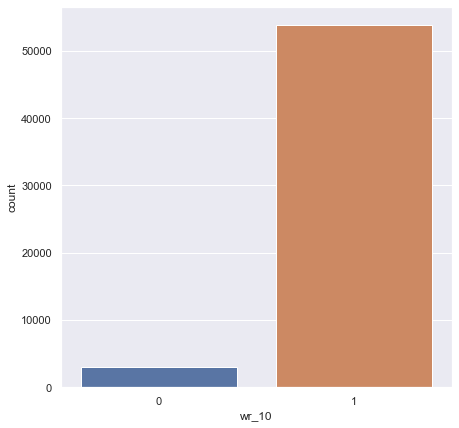

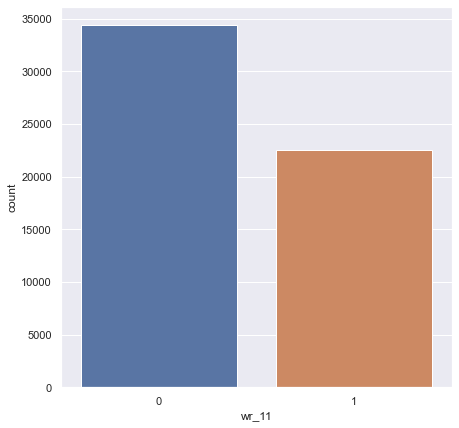

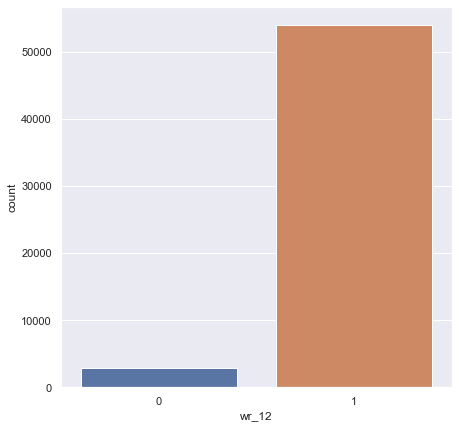

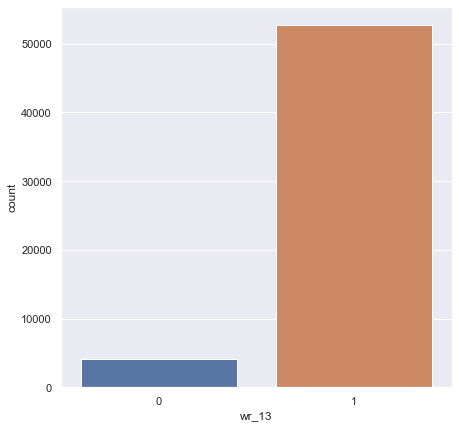

In [10]:
for col in vocab_cols.columns:
    fig,ax=plt.subplots(figsize=(7,7))
    sns.countplot(x=col,data=vocab_cols,ax=ax)

In [1]:
train.voted.value_counts()

NameError: name 'train' is not defined